## Perform basic Image Handling and Processing operations on an image

### Load and Display an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

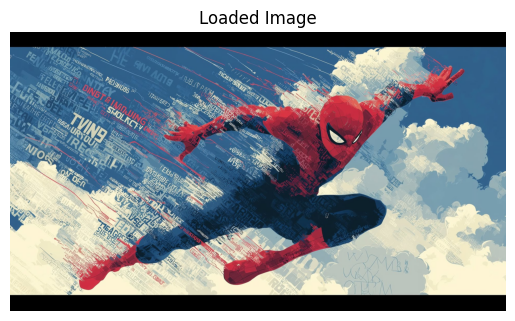

In [2]:
# Create a dummy image if input_image.jpg doesn't exist
image_path = 'images/input_image.jpg'
try:
    image_bgr = cv2.imread(image_path)

    if image_bgr is None:
        # Create a simple dummy image (red square)
        dummy_image = np.zeros((100, 100, 3), dtype=np.uint8)
        dummy_image[:, :, 2] = 255  # Set red channel to max
        cv2.imwrite(image_path, dummy_image)
        print(f"Created a dummy image at {image_path}")
        image_bgr = cv2.imread(image_path) # Try loading again


    if image_bgr is not None:
        # Convert the color space from BGR to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(image_rgb)
        plt.title('Loaded Image')
        plt.axis('off')  # Turn off the axis
        plt.show()
    else:
        print(f"Error: Unable to load image even after creating a dummy at {image_path}")


except Exception as e:
    print(f"An error occurred: {e}")

### Perform basic image operations

In [3]:
width = 200
aspect_ratio = float(image_bgr.shape[1]) / image_bgr.shape[0]
height = int(width / aspect_ratio)
resized_image = cv2.resize(image_bgr, (width, height))

grayscale_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

cv2.imwrite('images/resized_image.jpg', resized_image)

cv2.imwrite('images/grayscale_image.jpg', grayscale_image)

print("Resized image saved as 'images/resized_image.jpg'")
print("Grayscale image saved as 'images/grayscale_image.jpg'")

Resized image saved as 'images/resized_image.jpg'
Grayscale image saved as 'images/grayscale_image.jpg'


### Apply image processing techniques

In [4]:
# Apply simple thresholding
# Choose a threshold value (e.g., 127) and threshold type (e.g., cv2.THRESH_BINARY)
threshold_value = 127
ret, thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)

# Apply Gausssian blur filtering
# Choose a kernel size (e.g., (5, 5))
kernel_size = (5, 5)
blurred_image = cv2.GaussianBlur(grayscale_image, kernel_size, 0)

cv2.imwrite('images/thresholded_image.jpg', thresholded_image)

cv2.imwrite('images/blurred_image.jpg', blurred_image)


True

### Display all transformations

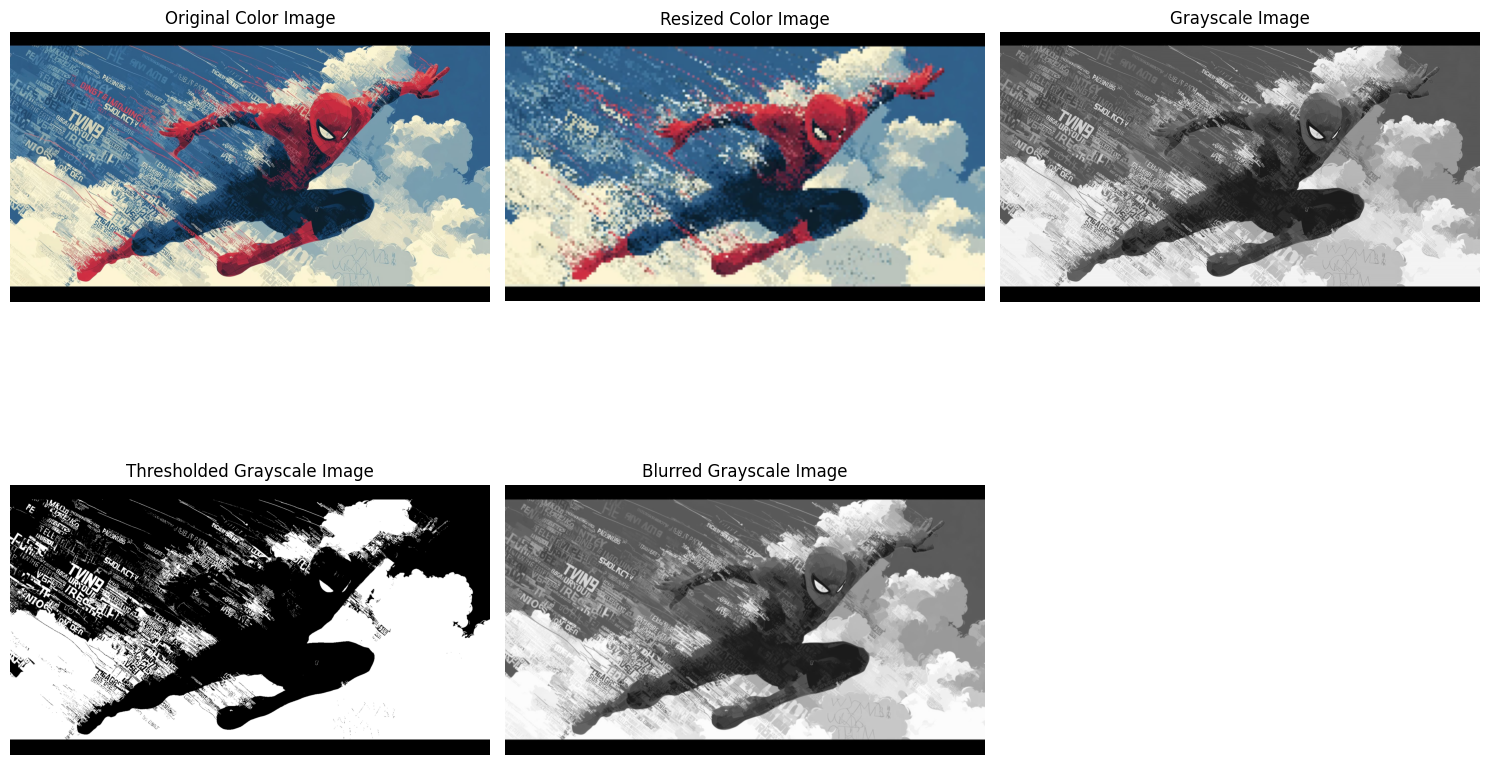

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Color Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()